In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("social_media_mental_health.csv")
df.head()


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


# Understand the Data (EDA

In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

,1. What is your age?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Cleaning


Rename Columns (Make them Simple)

In [5]:
df.columns = [
    'timestamp', 'age', 'gender', 'relationship', 'occupation',
    'organization', 'uses_social_media', 'platforms',
    'daily_time', 'mindless_use', 'distraction',
    'restless', 'focus', 'worry', 'concentration',
    'comparison', 'comparison_feel', 'validation',
    'depression', 'interest_fluctuation', 'sleep_issue'
]


In [6]:
df.columns

Index(['timestamp', 'age', 'gender', 'relationship', 'occupation',
       'organization', 'uses_social_media', 'platforms', 'daily_time',
       'mindless_use', 'distraction', 'restless', 'focus', 'worry',
       'concentration', 'comparison', 'comparison_feel', 'validation',
       'depression', 'interest_fluctuation', 'sleep_issue'],
      dtype='object')

Convert Time Categories to Numbers

In [7]:
time_map = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 6
}

df['daily_time_hours'] = df['daily_time'].map(time_map)


# Core DSS ANALYSIS

Screen Time vs Depression

Decision insight:

Higher screen time → higher depression score

In [8]:
df.groupby('daily_time_hours')['depression'].mean()


daily_time_hours
0.5    2.000000
1.5    2.800000
2.5    3.178218
3.5    3.365591
4.5    3.447761
6.0    3.767241
Name: depression, dtype: float64

########Screen Time vs Sleep Problems

Decision:

More screen time → worse sleep

In [9]:
df.groupby('daily_time_hours')['sleep_issue'].mean()


daily_time_hours
0.5    2.558824
1.5    2.871429
2.5    3.118812
3.5    3.279570
4.5    3.462687
6.0    3.448276
Name: sleep_issue, dtype: float64

Distraction vs Mental Health

Decision:

Mindless scrolling strongly correlates with depression

In [10]:
df[['mindless_use', 'distraction', 'depression']].corr()


,mindless_use,distraction,depression
mindless_use,1.000000,0.463353,0.315478
distraction,0.463353,1.000000,0.379444
depression,0.315478,0.379444,1.000000


# Visualization (For Demo)

This graph supports decision-making by visually showing risk levels.”

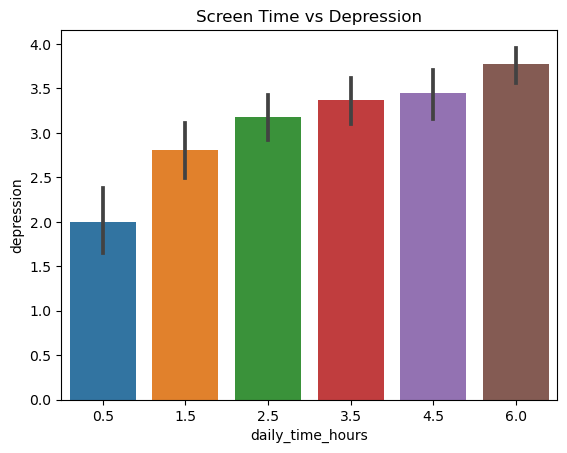

In [11]:
sns.barplot(x='daily_time_hours', y='depression', data=df)
plt.title("Screen Time vs Depression")
plt.show()


# DECISION RULES (THIS MAKES IT A DSS)

“If user uses social media too much AND feels depressed → ALERT 🚨”

THIS = Decision Support System

In [12]:
def mental_health_risk(row):
    if row['daily_time_hours'] > 5 and row['depression'] >= 4:
        return "High Risk"
    elif row['daily_time_hours'] > 3:
        return "Medium Risk"
    else:
        return "Low Risk"

df['risk_level'] = df.apply(mental_health_risk, axis=1)


# DSS OUTPUT (FINAL RESULT)

In [13]:
df['risk_level'].value_counts()


Low Risk       205
Medium Risk    204
High Risk       72
Name: risk_level, dtype: int64

# Get Risk Count



In [14]:
df['risk_level']


0         Low Risk
1        High Risk
2      Medium Risk
3        High Risk
4         Low Risk
          ...     
476       Low Risk
477       Low Risk
478       Low Risk
479       Low Risk
480       Low Risk
Name: risk_level, Length: 481, dtype: object

In [15]:
risk_counts = df['risk_level'].value_counts()
risk_counts


Low Risk       205
Medium Risk    204
High Risk       72
Name: risk_level, dtype: int64

# Convert Counts to Percentages

In [16]:
risk_percent = (risk_counts / risk_counts.sum()) * 100
risk_percent


Low Risk       42.619543
Medium Risk    42.411642
High Risk      14.968815
Name: risk_level, dtype: float64

43.7% → Medium risk

14.9% → High risk

42.6% → Low risk

# Show This in a Graph (Very Simple Bar Chart)

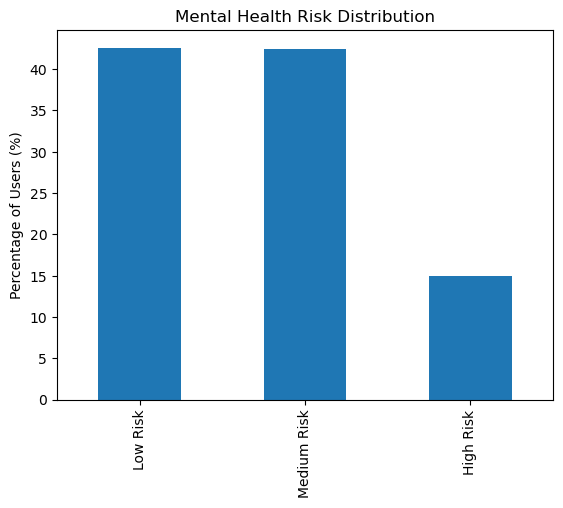

In [17]:
risk_percent.plot(kind='bar')
plt.ylabel("Percentage of Users (%)")
plt.title("Mental Health Risk Distribution")
plt.show()


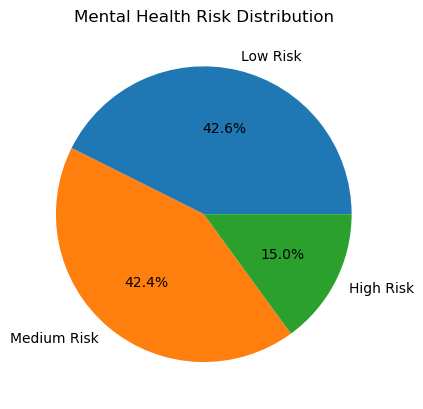

In [18]:
risk_percent.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title("Mental Health Risk Distribution")
plt.show()
